# Feature Engineering

## All files

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/MyDrive/TTKS 20203/VIB/Track 1 Datarathon'
%cd $path
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TTKS 20203/VIB/Track 1 Datarathon
'0.Data VIB Hackathon Guidline.xlsx'   4.Data_Deposit.csv
 1.Data_Customer.csv		       5.Data_Lending.csv
 2.Data_MyVIB_Transaction.csv	       6.Data_Card.csv
 3.Data_MyVIB_Activity.csv	       label_times.csv


In [ ]:
import glob
import pandas as pd

all_data = []
files = glob.glob(path + '/*.csv')
for i, file in enumerate(sorted(files)):
    print(file[57:], len(pd.read_csv(file)))
    all_data.append(file)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1.Data_Customer.csv 290223
2.Data_MyVIB_Transaction.csv 1418030
3.Data_MyVIB_Activity.csv 16132675
4.Data_Deposit.csv 1258424
5.Data_Lending.csv 576431
6.Data_Card.csv 871589


## Import Libs

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

sns.set()


## 1.Data_Customer.csv

In [ ]:
df1 = pd.read_csv(all_data[0])
print(df1.info())
df1.head()
# 3 continuous and 5 categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290223 entries, 0 to 290222
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   CUSTOMER_NUMBER      290223 non-null  int64 
 1   CLIENT_SEX           285940 non-null  object
 2   CLIENT_CREATE_DATE   290223 non-null  object
 3   DATE_OF_BIRTH        285934 non-null  object
 4   STAFF_VIB            290223 non-null  object
 5   IB_REGISTER_DATE     158975 non-null  object
 6   EB_REGISTER_CHANNEL  158975 non-null  object
 7   SMS                  158975 non-null  object
 8   VERIFY_METHOD        158947 non-null  object
dtypes: int64(1), object(8)
memory usage: 19.9+ MB
None


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CUSTOMER_NUMBER,CLIENT_SEX,CLIENT_CREATE_DATE,DATE_OF_BIRTH,STAFF_VIB,IB_REGISTER_DATE,EB_REGISTER_CHANNEL,SMS,VERIFY_METHOD
0,639362,M,2019-04-23,1996-01-01 00:00:00,N,2019-04-23,BRANCH,Y,SMS
1,452440,M,2019-01-11,1999-10-10 00:00:00,N,2019-01-11,BRANCH,Y,SMART_OTP
2,326290,F,2019-05-27,1996-06-29 00:00:00,N,2019-05-27,BRANCH,Y,SMS
3,20802,M,2019-11-12,1992-08-07 00:00:00,N,2019-11-12,BRANCH,Y,SMART_OTP
4,114244,M,2019-03-29,1973-10-15 00:00:00,N,2019-03-29,BRANCH,N,SMS


In [ ]:
a = pd.to_datetime(df1['IB_REGISTER_DATE'])
a.min()

Timestamp('2019-01-02 00:00:00')

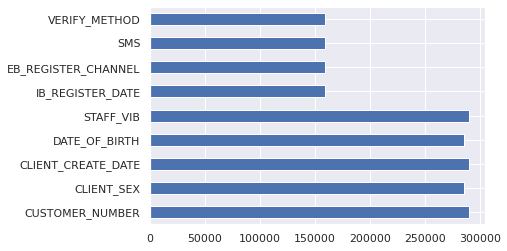

In [ ]:
# Not null value
df1.notnull().sum().plot(kind='barh')

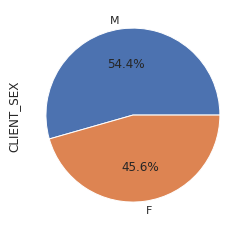

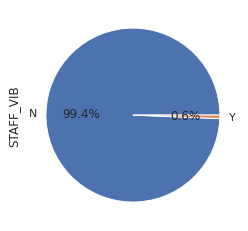

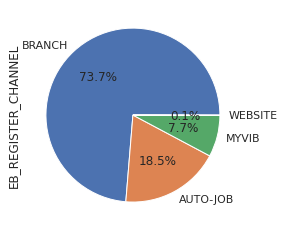

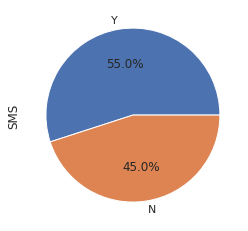

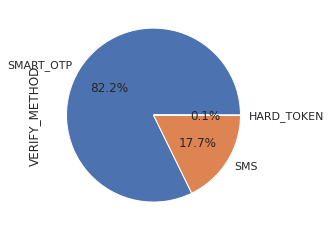

In [ ]:
# Tỷ lệ categorical data
cols_1 = ['CLIENT_SEX', 'STAFF_VIB', 'EB_REGISTER_CHANNEL', 'SMS', 'VERIFY_METHOD']
for col in cols_1:
    plt.show(df1[col].value_counts().plot(kind='pie', autopct='%1.1f%%'))

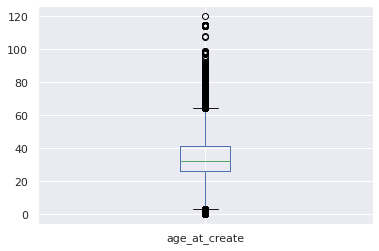

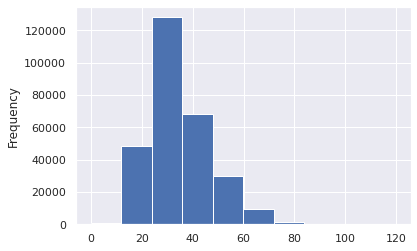

count    285929.000000
mean         34.643909
std          11.700123
min           0.002740
25%          25.879452
50%          32.282192
75%          41.084932
max         119.657534
Name: age_at_create, dtype: float64


,CUSTOMER_NUMBER,CLIENT_SEX,CLIENT_CREATE_DATE,DATE_OF_BIRTH,STAFF_VIB,IB_REGISTER_DATE,EB_REGISTER_CHANNEL,SMS,VERIFY_METHOD,age_at_create
0,639362,M,2019-04-23,1996-01-01 00:00:00,N,2019-04-23,BRANCH,Y,SMS,23.323288
1,452440,M,2019-01-11,1999-10-10 00:00:00,N,2019-01-11,BRANCH,Y,SMART_OTP,19.268493
2,326290,F,2019-05-27,1996-06-29 00:00:00,N,2019-05-27,BRANCH,Y,SMS,22.923288
3,20802,M,2019-11-12,1992-08-07 00:00:00,N,2019-11-12,BRANCH,Y,SMART_OTP,27.282192
4,114244,M,2019-03-29,1973-10-15 00:00:00,N,2019-03-29,BRANCH,N,SMS,45.482192


In [ ]:
# Độ tuổi mở tài khoản
df1 = df1.dropna(axis=0, subset=['CLIENT_CREATE_DATE', 'DATE_OF_BIRTH'])

df1['age_at_create'] = pd.to_datetime(df1['CLIENT_CREATE_DATE']) - pd.to_datetime(df1['DATE_OF_BIRTH'], errors = 'coerce')
df1['age_at_create'] = df1['age_at_create'].dt.days/365
df1 = df1.dropna(axis=0, subset=['age_at_create'])
# print(df1.loc[df1['age_at_create'].idxmax()]) #426638
# print(df1.loc[df1['age_at_create'].idxmin()]) #253248

plt.show(df1['age_at_create'].plot(kind='box'))
plt.show(df1['age_at_create'].plot(kind='hist'))
print(df1['age_at_create'].describe())
df1.head()

In [ ]:
def outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    return (df >= (Q1 - 1.5*IQR)) & (df <= (Q3 + 1.5*IQR))

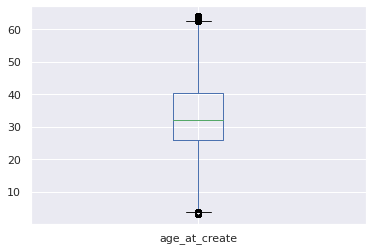

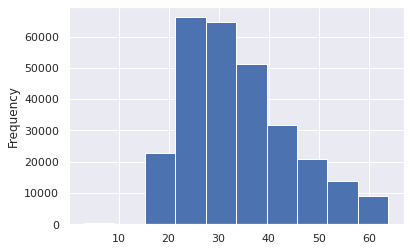

count    280392.000000
mean         34.001285
std          10.666849
min           3.090411
25%          25.786301
50%          32.030137
75%          40.413699
max          63.893151
Name: age_at_create, dtype: float64

In [ ]:
df1 = df1[outlier(df1['age_at_create'])]
plt.show(df1['age_at_create'].plot(kind='box'))
plt.show(df1['age_at_create'].plot(kind='hist'))
df1['age_at_create'].describe()

In [ ]:
# Ngày tạo tài khoản đến ngày đăng ký IB
df1 = df1.dropna(axis=0, subset=['IB_REGISTER_DATE'])

df1['create_to_ib_register'] = pd.to_datetime(df1['IB_REGISTER_DATE'])- pd.to_datetime(df1['CLIENT_CREATE_DATE'])
df1['create_to_ib_register'] = df1['create_to_ib_register'].dt.days
df1 = df1[df1['create_to_ib_register']>=0]

# df1.loc[df['create_to_ib_register'].idxmin()] #155156
# df1.loc[df['create_to_ib_register'].idxmax()] #761777

plt.show(df1['create_to_ib_register'].plot(kind='box'))
plt.show(df1['create_to_ib_register'].plot(kind='hist'))
df1['create_to_ib_register'].describe()

In [ ]:
df1 = df1[outlier(df1['create_to_ib_register'])]
plt.show(df1['create_to_ib_register'].plot(kind='box'))
plt.show(df1['create_to_ib_register'].plot(kind='hist'))
df1['create_to_ib_register'].describe()

In [ ]:
most_recent_crd = df1['CLIENT_CREATE_DATE'].max()
print('most_recent_CLIENT_CREATE_DATE: ', most_recent_crd)

most_recent_ird = df1['IB_REGISTER_DATE'].fillna("").max()
print('most_recent_IB_REGISTER_DATE: ', most_recent_ird)

# Timeline
timeline = pd.to_datetime(most_recent_ird) + pd.DateOffset(days=1)
print('timeline: ', timeline)

most_recent_CLIENT_CREATE_DATE:  2019-12-31
most_recent_IB_REGISTER_DATE:  2021-03-10
timeline:  2021-03-11 00:00:00


In [ ]:
# CLIENT_SEX: M to 1 ans F to 0
df1['CLIENT_SEX'] = df1['CLIENT_SEX'].replace({'M': 1, 'F': 0})

# STAFF_VIB: Y to 1 and N to 0
df1['STAFF_VIB'] = df1['STAFF_VIB'].replace({'Y': 1, 'N': 0})

# EB_REGISTER_CHANNEL
df1['EB_REGISTER_CHANNEL'] = df1['EB_REGISTER_CHANNEL'].replace({'WEBSITE': 0, 'MYVIB': 1, 'AUTO-JOB': 2, 'BRANCH': 3})

# SMS: Y to 1, N to 0
df1['SMS'] = df1['SMS'].replace({'Y': 1, 'N': 0})

# VERIFY_METHOD
df1['VERIFY_METHOD'] = df1['VERIFY_METHOD'].replace({'HARD_TOKEN': 0, 'SMS': 1, 'SMART_OTP': 2})

# CLIENT_CREATE_DATE to timeline in day
df1['CLIENT_CREATE_DATE'] = timeline - pd.to_datetime(df1['CLIENT_CREATE_DATE'])

# DATE_OF_BIRTH to timeline to age in day
df1['DATE_OF_BIRTH'] = timeline - pd.to_datetime(df1['DATE_OF_BIRTH'], errors = 'coerce')

# IB_REGISTER_DATE to timeline in day
df1['IB_REGISTER_DATE'] = timeline - pd.to_datetime(df1['IB_REGISTER_DATE'])

# Timedelta to int
cols_2 = ['CLIENT_CREATE_DATE', 'DATE_OF_BIRTH', 'IB_REGISTER_DATE']
for col in cols_2:
    df1[col] = df1[col].dt.days

# df1 = df1.drop(columns=['age_at_create'])
print(df1.describe())
df1.head()

       CUSTOMER_NUMBER     CLIENT_SEX  ...            SMS  VERIFY_METHOD
count    280392.000000  280392.000000  ...  158181.000000  158153.000000
mean     500665.243866       0.545668  ...       0.550591       1.822058
std      288650.655008       0.497911  ...       0.497436       0.384049
min           0.000000       0.000000  ...       0.000000       0.000000
25%      250916.500000       0.000000  ...       0.000000       2.000000
50%      501210.000000       1.000000  ...       1.000000       2.000000
75%      750241.500000       1.000000  ...       1.000000       2.000000
max      999997.000000       1.000000  ...       1.000000       2.000000

[8 rows x 9 columns]


,CUSTOMER_NUMBER,CLIENT_SEX,CLIENT_CREATE_DATE,DATE_OF_BIRTH,STAFF_VIB,IB_REGISTER_DATE,EB_REGISTER_CHANNEL,SMS,VERIFY_METHOD
0,639362,1,688,9201,0,688.0,3.0,1.0,1.0
1,452440,1,790,7823,0,790.0,3.0,1.0,2.0
2,326290,0,654,9021,0,654.0,3.0,1.0,1.0
3,20802,1,485,10443,0,485.0,3.0,1.0,2.0
4,114244,1,713,17314,0,713.0,3.0,0.0,1.0


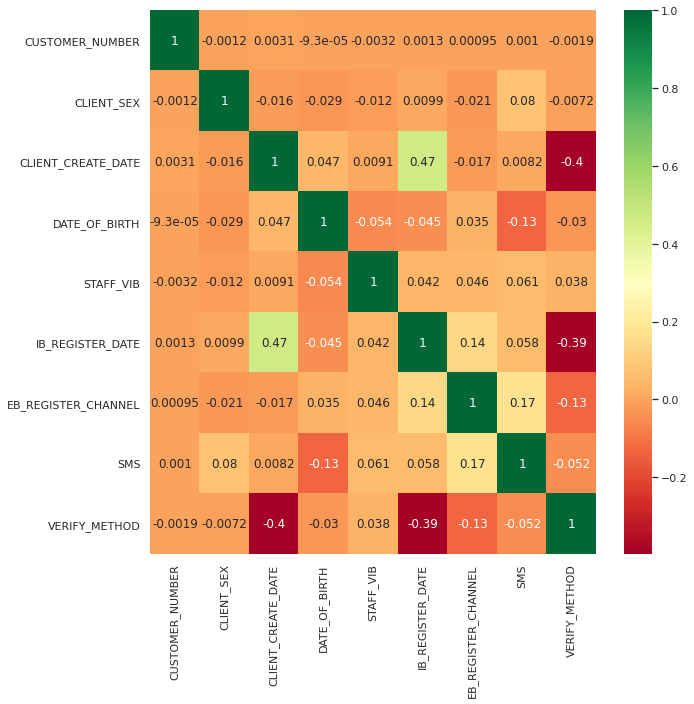

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df1[df1.columns].corr(), annot=True, cmap="RdYlGn")

##2.Data_MyVIB_Transaction.csv

In [ ]:
df2 = pd.read_csv(all_data[1])
print(df2.info())
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418030 entries, 0 to 1418029
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   TRANS_LV1        1418030 non-null  object 
 1   TRANS_LV2        1418030 non-null  object 
 2   TRANS_DATE       1418030 non-null  object 
 3   DAY_OF_WEEK      1418030 non-null  object 
 4   TRANS_HOUR       1418030 non-null  int64  
 5   TRANS_NO         1418030 non-null  int64  
 6   TRANS_AMOUNT     1418030 non-null  float64
 7   CUSTOMER_NUMBER  1418030 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 86.5+ MB
None


,TRANS_LV1,TRANS_LV2,TRANS_DATE,DAY_OF_WEEK,TRANS_HOUR,TRANS_NO,TRANS_AMOUNT,CUSTOMER_NUMBER
0,Transfer,Outside_VIB,2019-01-03,Thu,17,2,189771864.0,701619
1,Transfer,Outside_VIB,2019-07-01,Mon,13,2,30224900.0,701619
2,Transfer,Outside_VIB,2019-01-02,Wed,15,1,100000.0,701619
3,Payment,Credit_card_repayment,2019-01-03,Thu,14,1,85000000.0,262123
4,Payment,Credit_card_repayment,2019-01-28,Mon,22,1,83000000.0,262123


In [ ]:
for c in df2['CUSTOMER_NUMBER']:
    a = df2[df2['CUSTOMER_NUMBER']==c]
    b = a['TRANS_DATE'].nunique()
    d = len(a)
    if b-d != 0:
        print(c)

In [ ]:
a = df2[df2['CUSTOMER_NUMBER']==118682]
print(a['TRANS_DATE'].value_counts())
a[a['TRANS_DATE']=='2019-12-11']

2019-06-25    4
2019-12-11    4
2019-12-14    2
2019-12-06    2
2019-06-16    2
             ..
2019-05-18    1
2019-10-29    1
2019-12-05    1
2019-05-30    1
2019-02-26    1
Name: TRANS_DATE, Length: 69, dtype: int64


,TRANS_LV1,TRANS_LV2,TRANS_DATE,DAY_OF_WEEK,TRANS_HOUR,TRANS_NO,TRANS_AMOUNT,CUSTOMER_NUMBER
6109,Topup,Mobile,2019-12-11,Wed,12,1,100000.0,118682
6146,Transfer,Outside_VIB,2019-12-11,Wed,11,1,10000000.0,118682
6166,Transfer,Within_VIB,2019-12-11,Wed,9,1,20000000.0,118682
6176,Payment,Utilities_payment,2019-12-11,Wed,9,1,897376.0,118682


In [ ]:
a = pd.to_datetime(df2['TRANS_DATE'])
a.max()

Timestamp('2019-12-31 00:00:00')

In [ ]:
a = df2['TRANS_LV1'].value_counts()
df2['TRANS_LV1'].value_counts().plot(kind='pie', autopct='%1.1f%%')

NameError: ignored

In [ ]:
df2['TRANS_LV2'].value_counts().plot(kind='pie', autopct='%1.1f%%')
a = df2['TRANS_LV2'].value_counts()
a

In [ ]:
df2['DAY_OF_WEEK'].value_counts().plot(kind='pie', autopct='%1.1f%%')
a = df2['DAY_OF_WEEK'].value_counts()

In [ ]:
df2['TRANS_HOUR'].value_counts().plot(kind='pie', autopct='%1.1f%%')
a = df2['TRANS_HOUR'].value_counts()

In [ ]:
a = df2['TRANS_NO'].value_counts().nlargest(10)
a.plot(kind='pie', autopct='%1.1f%%')
df2['TRANS_NO'].sum()

In [ ]:
df = df2['TRANS_AMOUNT'].loc[df2['TRANS_AMOUNT'] < 10000]
plt.title('TRANS_AMOUNT per TRANS_NO < 10,000 đ')
df.plot(kind='hist')

In [ ]:
df = df2.groupby(['CUSTOMER_NUMBER'])[['TRANS_NO','TRANS_AMOUNT']].sum()
df.describe()

In [ ]:
a = df['TRANS_NO'].loc[df['TRANS_NO'] < 10]
a.plot(kind='hist')
a = a.value_counts()

In [ ]:
d = df['TRANS_AMOUNT'].loc[df['TRANS_AMOUNT'] <= 100000]
plt.title('TRANS_AMOUNT per TRANS_CUSTOMER <= 100,000 đ')
d.plot(kind='hist')
d.count()

##3.Data_MyVIB_Activity.csv

In [ ]:
df3 = pd.read_csv(all_data[2])
print(df3.describe())
df3

       ACTIVITY_HOUR   ACTIVITY_NO  CUSTOMER_NUMBER
count   1.613268e+07  1.613268e+07     1.613268e+07
mean    1.390035e+01  2.153330e+00     4.986190e+05
std     5.099397e+00  3.965386e+00     2.890715e+05
min     0.000000e+00  1.000000e+00     0.000000e+00
25%     1.000000e+01  1.000000e+00     2.465480e+05
50%     1.400000e+01  1.000000e+00     4.995670e+05
75%     1.800000e+01  2.000000e+00     7.498840e+05
max     2.300000e+01  2.486000e+03     9.999960e+05


,ACTIVITY_DATE,DAY_OF_WEEK,ACTIVITY_HOUR,ACTIVITY_NO,CUSTOMER_NUMBER,ACTIVITY_NAME
0,1/22/2019,Tue,20,2,630178,MB_INTEREST_RATE_VIEW
1,1/10/2019,Thu,18,16,630178,MB_INTEREST_RATE_VIEW
2,1/26/2019,Sat,17,15,630178,MB_INTEREST_RATE_VIEW
3,1/2/2019,Wed,9,27,630178,MB_INTEREST_RATE_VIEW
4,1/19/2019,Sat,8,3,630178,MB_INTEREST_RATE_VIEW
...,...,...,...,...,...,...
16132670,11/1/2019,Fri,11,1,327258,TRANSFER_VIB_ACCOUNT_BULK
16132671,12/2/2019,Mon,15,1,327258,TRANSFER_VIB_ACCOUNT_BULK
16132672,11/19/2019,Tue,17,1,882344,TRANSFER_VIB_ACCOUNT_BULK
16132673,11/13/2019,Wed,10,5,199908,RB_BILLPAY_PSTN


In [ ]:
a = df3[df3['CUSTOMER_NUMBER']==118682]
a

,ACTIVITY_DATE,DAY_OF_WEEK,ACTIVITY_HOUR,ACTIVITY_NO,CUSTOMER_NUMBER,ACTIVITY_NAME
76201,1/16/2019,Wed,2,37,118682,MB_INTEREST_RATE_VIEW
76202,1/31/2019,Thu,8,3,118682,MB_INTEREST_RATE_VIEW
76203,1/21/2019,Mon,19,3,118682,MB_INTEREST_RATE_VIEW
76204,1/21/2019,Mon,8,19,118682,MB_INTEREST_RATE_VIEW
76205,1/14/2019,Mon,11,13,118682,MB_INTEREST_RATE_VIEW
...,...,...,...,...,...,...
15856790,11/11/2019,Mon,23,1,118682,TRANSFER_VIB_ACCOUNT
15856791,12/11/2019,Wed,9,1,118682,TRANSFER_VIB_ACCOUNT
16079978,6/19/2019,Wed,20,1,118682,MB_CHANGE_PIN
16113542,12/11/2019,Wed,9,1,118682,MB_EXCHANGE_RATE_VIEW


In [ ]:
type(a['ACTIVITY_DATE'].iloc[0])

str

In [ ]:
a[a['ACTIVITY_DATE'] == '12/11/2019']

,ACTIVITY_DATE,DAY_OF_WEEK,ACTIVITY_HOUR,ACTIVITY_NO,CUSTOMER_NUMBER,ACTIVITY_NAME
76309,12/11/2019,Wed,9,13,118682,MB_INTEREST_RATE_VIEW
2567902,12/11/2019,Wed,15,1,118682,LOGIN
2567903,12/11/2019,Wed,11,1,118682,LOGIN
2567904,12/11/2019,Wed,10,1,118682,LOGIN
2567908,12/11/2019,Wed,12,1,118682,LOGIN
2567923,12/11/2019,Wed,9,2,118682,LOGIN
6167959,12/11/2019,Wed,10,1,118682,QUERY_ACCOUNT_INFORMATION
6167962,12/11/2019,Wed,9,7,118682,QUERY_ACCOUNT_INFORMATION
9846469,12/11/2019,Wed,12,1,118682,LOGOUT
9846472,12/11/2019,Wed,9,1,118682,LOGOUT


In [ ]:
a = pd.to_datetime(df3['ACTIVITY_DATE'])
a.min()

Timestamp('2019-01-01 00:00:00')

16132675


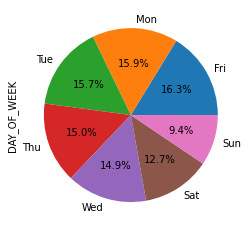

In [ ]:
a = df3['DAY_OF_WEEK']
print(a.count())
a=a.value_counts()
a.plot(kind='pie', autopct='%1.1f%%')

24


16132675

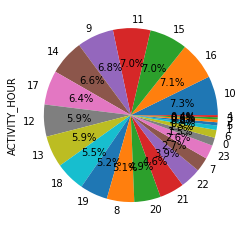

In [ ]:
a = df3['ACTIVITY_HOUR'].value_counts()
print(a.count())
a.plot(kind='pie', autopct='%1.1f%%')
df3['ACTIVITY_HOUR'].count()

34738977

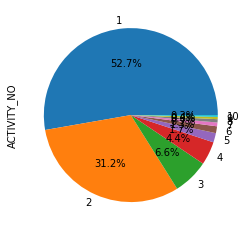

In [ ]:
a = df3['ACTIVITY_NO'].value_counts().nlargest(10)
a.plot(kind='pie', autopct='%1.1f%%')
df3['ACTIVITY_NO'].sum()

45

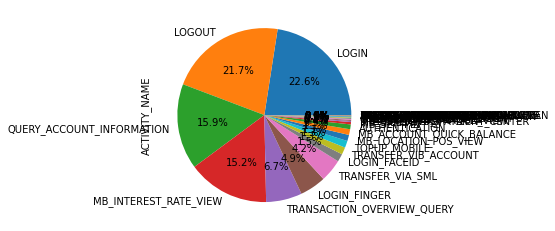

In [ ]:
a = df3['ACTIVITY_NAME'].value_counts()
a.plot(kind='pie', autopct='%1.1f%%')
a.count()

In [ ]:
df = df3.groupby(['CUSTOMER_NUMBER'])[['ACTIVITY_NO']].sum()
df.describe()

,ACTIVITY_NO
count,77741.000000
mean,446.855289
std,764.375822
min,1.000000
25%,80.000000
50%,225.000000
75%,529.000000
max,31945.000000


1    662
2    484
3    281
4    285
5    216
6    283
7    263
8    330
9    330
Name: ACTIVITY_NO, dtype: int64

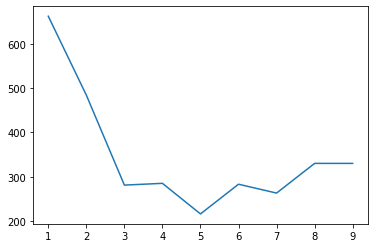

In [ ]:
a = df['ACTIVITY_NO'].loc[df['ACTIVITY_NO'] < 10]
# a.plot(kind='hist')
a = a.value_counts()
a = a.sort_index()
a.plot.line()
a

##4.Data_Deposit.csv

In [ ]:
df4 = pd.read_csv(all_data[3])
print(df4.info())
df4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258424 entries, 0 to 1258423
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   MONTH            1258424 non-null  object 
 1   COUNT_CA_ACCT    1258424 non-null  int64  
 2   AVG_CA_BALANCE   1258424 non-null  float64
 3   COUNT_TD_ACCT    1258424 non-null  int64  
 4   AVG_TD_BALANCE   1258424 non-null  float64
 5   CUSTOMER_NUMBER  1258424 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 57.6+ MB
None


,MONTH,COUNT_CA_ACCT,AVG_CA_BALANCE,COUNT_TD_ACCT,AVG_TD_BALANCE,CUSTOMER_NUMBER
0,1/31/2019,1,246774.19,0,0.0,914393
1,2/28/2019,1,209207.36,0,0.0,914393
2,3/31/2019,1,213225.90,0,0.0,914393
3,4/30/2019,1,211761.87,0,0.0,914393
4,5/31/2019,1,222391.16,0,0.0,914393


In [ ]:
a = pd.to_datetime(df4['MONTH'])
a.max()

Timestamp('2019-12-31 00:00:00')

In [ ]:
df4.describe()

,COUNT_CA_ACCT,AVG_CA_BALANCE,COUNT_TD_ACCT,AVG_TD_BALANCE,CUSTOMER_NUMBER
count,1.258424e+06,1.258424e+06,1.258424e+06,1.258424e+06,1.258424e+06
mean,9.362313e-01,4.744692e+06,2.181848e-01,4.959629e+07,5.012424e+05
std,2.820505e-01,7.254613e+07,6.900133e-01,4.417742e+08,2.887806e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,8.635484e+04,0.000000e+00,0.000000e+00,2.511150e+05
50%,1.000000e+00,2.897488e+05,0.000000e+00,0.000000e+00,5.020280e+05
75%,1.000000e+00,1.334255e+06,0.000000e+00,0.000000e+00,7.511750e+05
max,1.000000e+01,2.603122e+10,3.700000e+01,1.255000e+11,9.999970e+05


In [ ]:
a = df4['COUNT_CA_ACCT'].value_counts()
a.plot(kind='pie', autopct='%1.1f%%')
a

In [ ]:
df = df4['AVG_CA_BALANCE'].loc[df4['AVG_CA_BALANCE'] < 10000]
plt.title('AVG_CA_BALANCE < 10,000 đ')
df.plot(kind='hist')

In [ ]:
a = df4['COUNT_TD_ACCT'].value_counts()
a.plot(kind='pie', autopct='%1.1f%%')
a

In [ ]:
df4['AVG_TD_BALANCE'].plot(kind='hist')

In [ ]:
df = df4['AVG_TD_BALANCE'].loc[(df4['AVG_TD_BALANCE'] > 0) & (df4['AVG_TD_BALANCE'] <= 100000)]
plt.title('0< AVG_TD_BALANCE <= 100,000 đ')
df.plot(kind='hist', bins=5)

In [ ]:
df = df4.groupby(['CUSTOMER_NUMBER']).max()
df.describe()

,COUNT_CA_ACCT,AVG_CA_BALANCE,COUNT_TD_ACCT,AVG_TD_BALANCE
count,223817.000000,2.238170e+05,223817.000000,2.238170e+05
mean,0.940728,1.147368e+07,0.317152,8.556495e+07
std,0.280833,1.223585e+08,0.869103,6.527224e+08
min,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,1.000000,1.882667e+05,0.000000,0.000000e+00
50%,1.000000,8.917960e+05,0.000000,0.000000e+00
75%,1.000000,3.459907e+06,0.000000,0.000000e+00
max,10.000000,2.603122e+10,37.000000,1.255000e+11


In [ ]:
a = df['COUNT_CA_ACCT'].value_counts()
a.plot(kind='pie', autopct='%1.1f%%')
df['COUNT_CA_ACCT'].sum()

In [ ]:
a = df['COUNT_TD_ACCT'].value_counts()
a.plot(kind='pie', autopct='%1.1f%%')
df['COUNT_TD_ACCT'].sum()

0.00        14798
88645.16      877
88633.33      408
70894.00      308
88266.67      264
            ...  
53660.13        1
30550.90        1
36125.74        1
13176.94        1
53037.74        1
Name: AVG_CA_BALANCE, Length: 10962, dtype: int64

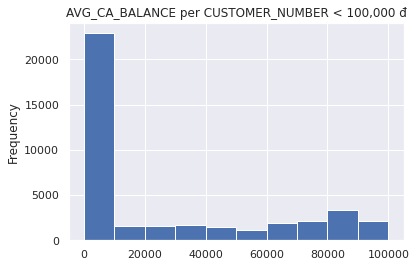

In [ ]:
a = df['AVG_CA_BALANCE'].loc[df['AVG_CA_BALANCE'] < 100000]
plt.title('AVG_CA_BALANCE per CUSTOMER_NUMBER < 100,000 đ')
a.plot(kind='hist')
a.value_counts()

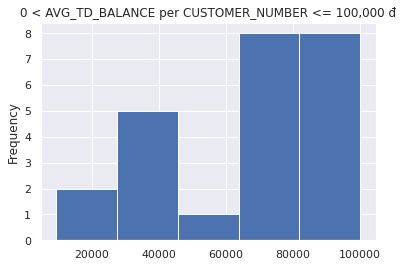

In [ ]:
a = df['AVG_TD_BALANCE'].loc[(df['AVG_TD_BALANCE'] > 0) & (df['AVG_TD_BALANCE'] <= 100000)]
plt.title('0 < AVG_TD_BALANCE per CUSTOMER_NUMBER <= 100,000 đ')
a.plot(kind='hist', bins=5)

##5.Data_Lending.csv

In [ ]:
df5 = pd.read_csv(all_data[4])
print(df5.info())
df5.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576431 entries, 0 to 576430
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   MONTH            576431 non-null  object 
 1   COUNT_OF_LOAN    576431 non-null  int64  
 2   AVG_LOAN_AMOUNT  576431 non-null  float64
 3   CUSTOMER_NUMBER  576431 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 17.6+ MB
None


,MONTH,COUNT_OF_LOAN,AVG_LOAN_AMOUNT,CUSTOMER_NUMBER
0,1/31/2019,1,15000000.0,811795
1,2/28/2019,1,13450000.0,811795
2,4/30/2019,1,14169673.0,811795
3,3/31/2019,1,12901665.0,811795
4,9/30/2019,1,13274815.0,811795


In [ ]:
a = pd.to_datetime(df5['MONTH'])
a.min()

In [ ]:
df5['COUNT_OF_LOAN'].value_counts().plot(kind='pie', autopct='%1.1f%%')
a = df5['COUNT_OF_LOAN'].value_counts()
df5['COUNT_OF_LOAN'].sum()

In [ ]:
a = df5['AVG_LOAN_AMOUNT'].loc[df5['AVG_LOAN_AMOUNT'] <= 1000]
plt.title("AVG_LOAN_AMOUNT < 10,000 đ")
a.plot(kind='hist')
a.count()

In [ ]:
df = df5.groupby(['CUSTOMER_NUMBER'])[['COUNT_OF_LOAN','AVG_LOAN_AMOUNT']].sum()
df.describe()

In [ ]:
a = df['COUNT_OF_LOAN'].loc[df['COUNT_OF_LOAN'] < 10]
a.plot(kind='hist')
a = a.value_counts()

In [ ]:
d = df['AVG_LOAN_AMOUNT'].loc[df['AVG_LOAN_AMOUNT'] <= 100000]
plt.title('AVG_LOAN_AMOUNT per CUSTOMER_NUMBER <= 100,000 đ')
d.plot(kind='hist')
d.count()

##6.Data_Card.csv

In [ ]:
df6 = pd.read_csv(all_data[5])
print(df6.info())
df6.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871589 entries, 0 to 871588
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   MONTH             871589 non-null  object
 1   COUNT_CREDITCARD  871589 non-null  int64 
 2   COUNT_DEBITCARD   871589 non-null  int64 
 3   CUSTOMER_NUMBER   871589 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 26.6+ MB
None


,MONTH,COUNT_CREDITCARD,COUNT_DEBITCARD,CUSTOMER_NUMBER
0,9/30/2019,0,1,914326
1,4/30/2019,0,1,914326
2,11/30/2019,0,1,914326
3,8/31/2019,0,1,914326
4,12/31/2019,0,1,914326


In [ ]:
a = pd.to_datetime(df6['MONTH'])
a.max()

Timestamp('2019-12-31 00:00:00')

In [ ]:
a = df6['COUNT_CREDITCARD'].value_counts()
a.plot(kind='pie', autopct='%1.1f%%')
a

In [ ]:
a = df6['COUNT_DEBITCARD'].value_counts()
a.plot(kind='pie', autopct='%1.1f%%')
a

In [ ]:
df = df6.groupby(['CUSTOMER_NUMBER'])[['COUNT_CREDITCARD','COUNT_DEBITCARD']].max()
df.describe()

In [ ]:
a = df['COUNT_CREDITCARD']
a.plot(kind='hist')
a = a.value_counts()

In [ ]:
a = df['COUNT_DEBITCARD']
a.plot(kind='hist')
a = a.value_counts()

## !

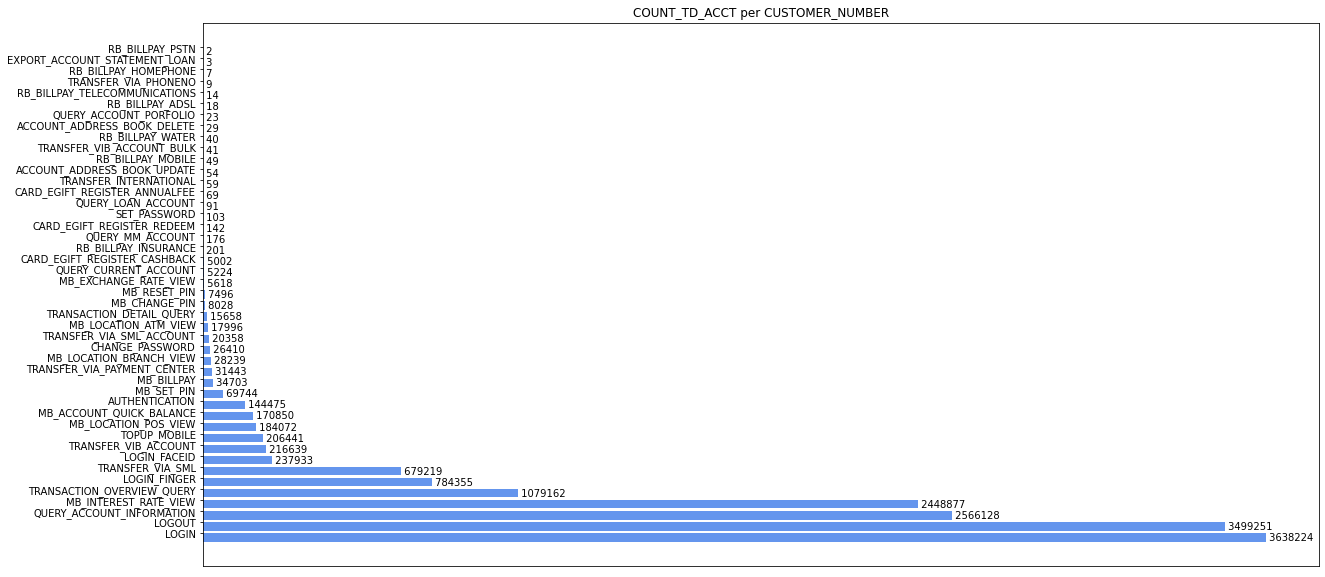

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = a.index
y = a
fig, ax = plt.subplots(figsize=(20,10))    
for i, v in enumerate(y):
    ax.text(v, i, " "+str(v), color='black', va='center')
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="cornflowerblue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)     
plt.title('COUNT_TD_ACCT per CUSTOMER_NUMBER')
plt.xticks([])
plt.show()

# @

In [ ]:
%%capture
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import pandas as pd
import pandas_profiling

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/TTKS 20203/VIB/Track 1 Datarathon/5.Data_Lending.csv')
profile = pandas_profiling.ProfileReport(data, title='Pandas Profiling Report', explorative=True)
profile